In [1]:
!pip install azure-storage-blob

In [2]:
#!pip install azure-storage-blob

import pandas as pd
from io import StringIO
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient

connection_string = "DefaultEndpointsProtocol=https;AccountName=mloblistorage;AccountKey=u+SGxSxdN+0KtUq2qwRS2zD+Ul4hBnt+nhAzPok53QggOuXa9+5V3VU8NDHiGmG2zN+ghQ7V+AtY+ASt8kPFcA==;EndpointSuffix=core.windows.net"
container_name ="mloblistoragecontainer"
blob_name = "properties_tienda_inglesa.csv"

blob_service_client = BlobServiceClient.from_connection_string(connection_string)
container_client = blob_service_client.get_container_client(container_name)

blob_client = container_client.get_blob_client(blob_name)
csv_data = blob_client.download_blob().content_as_text()

data = StringIO(csv_data)
df = pd.read_csv(data, header=None, names=['id','image_urls','images','link','product_name','property_type','source','url'])
#id,image_urls,images,link,product_name,property_type,source,url

valid_categories=["WAREHOUSE",
             "DRINKS",
            "CLEANING",
             "FROZEN",
            "TECHNOLOGY",
             "PERFUMERY"]


In [3]:
df = df_filtrado = df.query('property_type in @valid_categories')
df = df[~df['id'].duplicated()]
df

,id,image_urls,images,link,product_name,property_type,source,url
0,29465,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Tapas-para-Em...,Tapas para Empanadas Hojaldradas TIENDA INGLES...,WAREHOUSE,tienda_inglesa,https://www.tiendainglesa.com.uy/Tapas-para-Em...
1,218557,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Galleta-Arroz...,Galleta Arroz CEREALITAS 160 gr,WAREHOUSE,tienda_inglesa,https://www.tiendainglesa.com.uy/Galleta-Arroz...
3,99775,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Refresco-PASO...,Refresco PASO DE LOS TOROS Pomelo sin Azúcar 1...,DRINKS,tienda_inglesa,https://www.tiendainglesa.com.uy/Refresco-PASO...
4,86019,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Pizza-con-Muz...,Pizza con Muzzarella y Tomate Pack Familiar SI...,CLEANING,tienda_inglesa,https://www.tiendainglesa.com.uy/Pizza-con-Muz...
5,57950,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Papel-Higieni...,Papel Higiénico HIGIENOL Doble Hoja Premium 4 ...,FROZEN,tienda_inglesa,https://www.tiendainglesa.com.uy/Papel-Higieni...
...,...,...,...,...,...,...,...,...
25736,108410,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Calefon-JAMES...,Calefón JAMES 60 L,TECHNOLOGY,tienda_inglesa,https://www.tiendainglesa.com.uy/Calefon-JAMES...
25737,301502,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Resma-de-Pape...,Resma de Papel para Impresora FANACOPY A4 75 gr,TECHNOLOGY,tienda_inglesa,https://www.tiendainglesa.com.uy/Resma-de-Pape...
25738,461922,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Lavarropa-JAM...,Lavarropa JAMES Carga Frontal Blanco Display L...,TECHNOLOGY,tienda_inglesa,https://www.tiendainglesa.com.uy/Lavarropa-JAM...
25739,536075,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Aire-Acondici...,Aire Acondicionado ECOSYSTEM 12000 BTU Inverte...,TECHNOLOGY,tienda_inglesa,https://www.tiendainglesa.com.uy/Aire-Acondici...


In [4]:
def get_image_from_blob(blob_client):
    stream = io.BytesIO()
    download_stream = blob_client.download_blob()
    stream.write(download_stream.readall())

    stream.seek(0)
    image = Image.open(stream)
    return image

In [5]:
def show_image(blob_client, blob_name):

    image = get_image_from_blob(blob_client, blob_name)

    plt.imshow(image)
    plt.show()


In [6]:
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient
import io
from PIL import Image
import matplotlib.pyplot as plt

try:
    blob_service_client = BlobServiceClient.from_connection_string(connection_string)
    blob_name = 'full/0094e2445afde938bd97477f21149e43101f1ebf.jpg'
    blob_client = blob_service_client.get_blob_client(container_name, blob_name)

    show_image(blob_client, blob_name)

except Exception as ex:
    print('Exception:')
    print(ex)

Exception:
get_image_from_blob() takes 1 positional argument but 2 were given


In [7]:
IMAGE_SIZE=32

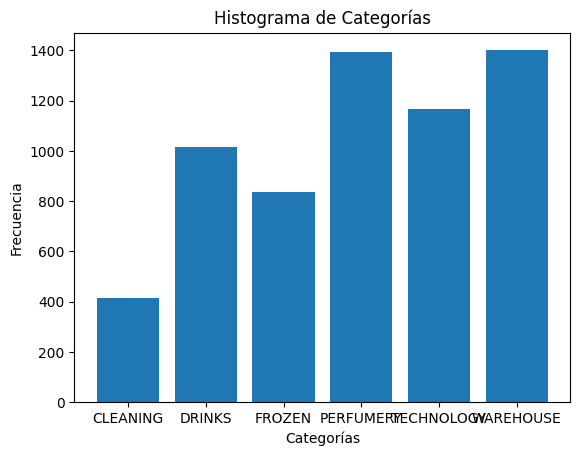

In [8]:
import numpy as np
categories=df['property_type'].values

conteo_categorias = np.unique(categories, return_counts=True)

categorias_unicas = conteo_categorias[0]
conteos = conteo_categorias[1]

plt.bar(categorias_unicas, conteos)

plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.title('Histograma de Categorías')

plt.show()

In [9]:
import ast

image_ids=[]
images =[]
count=1;
for index, row in df.iterrows():
    lista_json = row['images']
    b=ast.literal_eval(lista_json[1:-1])
    path =  b.get("path")

    blob_client = blob_service_client.get_blob_client(container_name, path)


    images.append(get_image_from_blob(blob_client).resize((IMAGE_SIZE,IMAGE_SIZE)))

    image_ids.append(row['id'])
    if count%200==0:
      print(f"Load {count} images of {df.shape[0]}")
    count+=1



Load 200 images of 6229
Load 400 images of 6229
Load 600 images of 6229
Load 800 images of 6229
Load 1000 images of 6229
Load 1200 images of 6229
Load 1400 images of 6229
Load 1600 images of 6229
Load 1800 images of 6229
Load 2000 images of 6229
Load 2200 images of 6229
Load 2400 images of 6229
Load 2600 images of 6229
Load 2800 images of 6229
Load 3000 images of 6229
Load 3200 images of 6229
Load 3400 images of 6229
Load 3600 images of 6229
Load 3800 images of 6229
Load 4000 images of 6229
Load 4200 images of 6229
Load 4400 images of 6229
Load 4600 images of 6229
Load 4800 images of 6229
Load 5000 images of 6229
Load 5200 images of 6229
Load 5400 images of 6229
Load 5600 images of 6229
Load 5800 images of 6229
Load 6000 images of 6229
Load 6200 images of 6229


In [10]:
images_backup=images
print(images_backup)

[<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF4177BEC80>, <PIL.Image.Image image mode=RGB size=32x32 at 0x7FF419EC1FF0>, <PIL.Image.Image image mode=RGB size=32x32 at 0x7FF4177BDA80>, <PIL.Image.Image image mode=RGB size=32x32 at 0x7FF418BBF9D0>, <PIL.Image.Image image mode=RGB size=32x32 at 0x7FF418C36560>, <PIL.Image.Image image mode=RGB size=32x32 at 0x7FF418C37190>, <PIL.Image.Image image mode=RGB size=32x32 at 0x7FF418C37070>, <PIL.Image.Image image mode=RGB size=32x32 at 0x7FF418BBFA00>, <PIL.Image.Image image mode=RGB size=32x32 at 0x7FF4177BDBA0>, <PIL.Image.Image image mode=RGB size=32x32 at 0x7FF418BBFA30>, <PIL.Image.Image image mode=RGB size=32x32 at 0x7FF418BBF5E0>, <PIL.Image.Image image mode=RGB size=32x32 at 0x7FF418BBF2E0>, <PIL.Image.Image image mode=RGB size=32x32 at 0x7FF4177BDC90>, <PIL.Image.Image image mode=RGB size=32x32 at 0x7FF418BBF220>, <PIL.Image.Image image mode=RGB size=32x32 at 0x7FF418BBF580>, <PIL.Image.Image image mode=RGB size=32x32 at 0x7FF417

In [11]:
images=[(np.array(imagen_pil)) for imagen_pil in images]
print(images)
#images=images_backup

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [12]:
lista_np = []
for imagen_np in images:
    lista_np.append(imagen_np)
images=np.array(lista_np)

In [22]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))



In [25]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers.experimental import preprocessing
from keras.optimizers import Adam

num_categorias = len(np.unique(categories))


imagenes = images.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 3)

categorias_encoded, categorias_mapping = np.unique(categories, return_inverse=True)
categorias_encoded = to_categorical(categorias_mapping, num_categorias)

scaler = MinMaxScaler()
imagenes_train, imagenes_test, categorias_train, categorias_test = train_test_split(
    imagenes, categorias_encoded, test_size=0.2, random_state=42)



#augmentation
data_augmentation = Sequential([
    preprocessing.Rescaling(1./255),
    preprocessing.RandomRotation(0.15),
    preprocessing.RandomFlip("vertical"),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomTranslation(0.1, 0.1),
    preprocessing.RandomContrast(0.3),
    preprocessing.RandomCrop(30, 30)
])


model = Sequential()
model.add(data_augmentation)

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_categorias, activation='softmax'))

opt = Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])

fitted = model.fit(imagenes_train, categorias_train, epochs=10, validation_split=0.2, batch_size=64)

print(fitted.history)
loss, accuracy,f1,precision,recall = model.evaluate(imagenes_test, categorias_test)
print(f"Loss en el conjunto de prueba: {loss}")
print(f"F1-Score en el conjunto de prueba: {f1}")
print(f"Precision en el conjunto de prueba: {precision}")
print(f"Recall en el conjunto de prueba: {recall}")

print(f"Accuracy en el conjunto de prueba: {accuracy}")

predicciones = model.predict(imagenes_test)

Epoch 1/10
63/63 [==============================] - 6s 70ms/step - loss: 1.7106 - f1_m: 0.0030 - accuracy: 0.2554 - precision_m: 0.0206 - recall_m: 0.0016 - val_loss: 1.5652 - val_f1_m: 0.1411 - val_accuracy: 0.3641 - val_precision_m: 0.5549 - val_recall_m: 0.0815
Epoch 2/10
63/63 [==============================] - 5s 78ms/step - loss: 1.5748 - f1_m: 0.1101 - accuracy: 0.3573 - precision_m: 0.5939 - recall_m: 0.0637 - val_loss: 1.4626 - val_f1_m: 0.2616 - val_accuracy: 0.4604 - val_precision_m: 0.5682 - val_recall_m: 0.1713
Epoch 3/10
63/63 [==============================] - 4s 66ms/step - loss: 1.4824 - f1_m: 0.1308 - accuracy: 0.4087 - precision_m: 0.5618 - recall_m: 0.0781 - val_loss: 1.4193 - val_f1_m: 0.0735 - val_accuracy: 0.4564 - val_precision_m: 0.5332 - val_recall_m: 0.0400
Epoch 4/10
63/63 [==============================] - 4s 65ms/step - loss: 1.3968 - f1_m: 0.2271 - accuracy: 0.4456 - precision_m: 0.6359 - recall_m: 0.1436 - val_loss: 1.3133 - val_f1_m: 0.3017 - val_accura

In [ ]:
from keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_categorias, activation='softmax'))  # Suponiendo 10 categorías

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(imagenes_train, categorias_train, epochs=10, batch_size=32)

loss, accuracy = model.evaluate(imagenes_test, categorias_test)
print(f"Loss en el conjunto de prueba: {loss}")
print(f"Accuracy en el conjunto de prueba: {accuracy}")

predicciones = model.predict(imagenes_test)


1) hash
2) tf.update/tf.transform para versuones
3) metricas en los mdoelos
